<a href="https://colab.research.google.com/github/papillonsss-666/Nengo-Code-Example/blob/main/Neurons_of_Several_Clusters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neurons of Several Clusters

In [20]:
!pip install nengo

In [21]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import nengo
from nengo.dists import Choice
from nengo.processes import Piecewise
from nengo.utils.ensemble import response_curves, tuning_curves
from nengo.utils.ensemble import sorted_neurons
from nengo.utils.matplotlib import rasterplot

## Input Function

In [22]:
# Piecewise input
piecewise = Piecewise({0: 0, 0.2: 0.5, 1: 0, 2: -1, 3: 0, 4: 1, 5: 0})

In [23]:
piecewise = Piecewise({0: -1, 2.5: 1})

In [24]:
# Triangular Input
def triangle_input(t):
  if t <= 2.5:
    return t * 0.4
  else:
    return 0.4*(5 - t)

## Several Clusters


In [25]:
# Create a sin wave function
def sin(t):
  return np.sin(8*t)

In [26]:
input = sin

In [27]:
model = nengo.Network()
with model:
    # Input is a sin wave
    input = nengo.Node(input)

    # Our ensemble consists of 100 leaky integrate-and-fire neurons,
    # representing a one-dimensional signal

    # ens_1 has a positive encoder and an intercept of 0.5. So when the input > 0.5, the neurons will be activated
    ens_1 = nengo.Ensemble(30, dimensions=1)
    ens_1.encoders = Choice([[1]])
    ens_1.intercepts = Choice([0.5])

    # ens_1 has a negative encoder and an intercept of 0.5. So when the input < -0.5, the neurons will be activated
    ens_2 = nengo.Ensemble(30, dimensions=1)
    ens_2.encoders = Choice([[-1]])
    ens_2.intercepts = Choice([0.5])

    # ens_1 has a positive encoder and an intercept of -0.5. So when the input > -0.5, the neurons will be activated
    ens_3 = nengo.Ensemble(40, dimensions=1)
    ens_3.encoders = Choice([[1]])
    ens_3.intercepts = Choice([-0.5])

    # Connect the input to the population
    # All ensembles have the same input
    nengo.Connection(input, ens_1, synapse = 0.01)
    nengo.Connection(input, ens_2, synapse = 0.01)
    nengo.Connection(input, ens_3, synapse = 0.01)

    # Create probes to collect the data
    input_probe = nengo.Probe(input)

    ens_1_probe = nengo.Probe(ens_1, synapse = 0.01)
    ens_1_spike = nengo.Probe(ens_1.neurons)

    ens_2_probe = nengo.Probe(ens_2, synapse = 0.01)
    ens_2_spike = nengo.Probe(ens_2.neurons)

    ens_3_probe = nengo.Probe(ens_3, synapse = 0.01)
    ens_3_spike = nengo.Probe(ens_3.neurons)

# Create simulator
with nengo.Simulator(model) as sim:
  sim.run(5)




HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

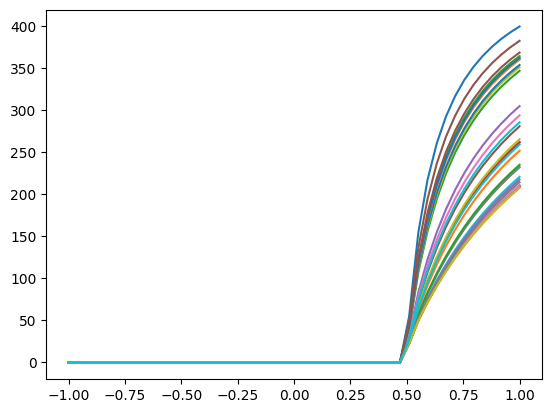

In [28]:
# Tuning curve of ens_1
plt.figure()
plt.plot(*tuning_curves(ens_1, sim))
plt.show()

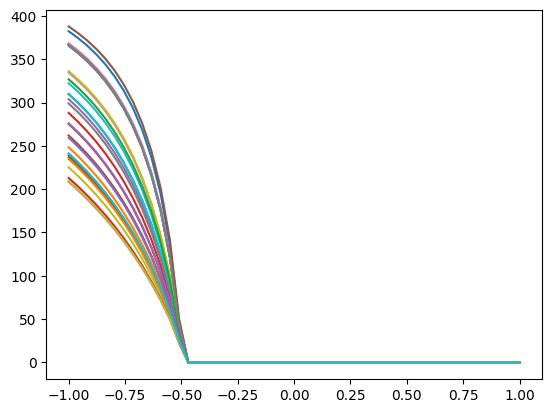

In [29]:
# Tuning curve of ens_2
plt.figure()
plt.plot(*tuning_curves(ens_2, sim))
plt.show()

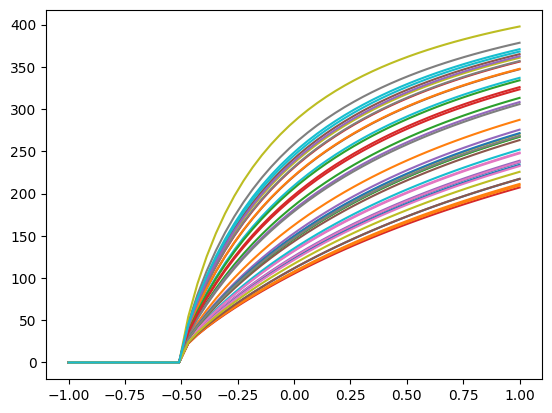

In [30]:
# Tuning curve of ens_3, is the opposite of ens_2
# The spike trains of ens_3 should bo approx. opposite of ens_2 as well
plt.figure()
plt.plot(*tuning_curves(ens_3, sim))
plt.show()

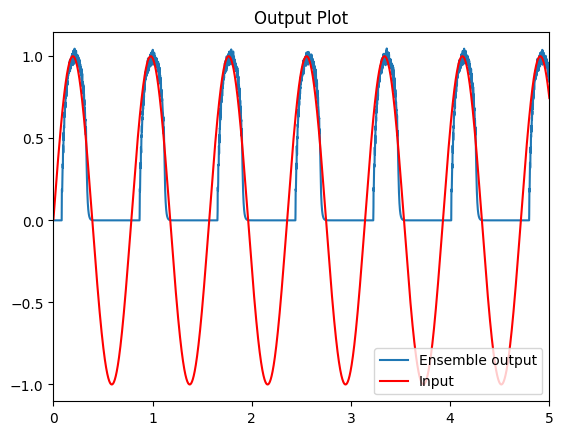

In [31]:
plt.figure()
plt.plot(sim.trange(), sim.data[ens_1_probe], label="Ensemble output")
plt.plot(sim.trange(), sim.data[input_probe], "r", label="Input")
plt.xlim(0, 5)
plt.title("Output Plot")
plt.legend()
plt.show()

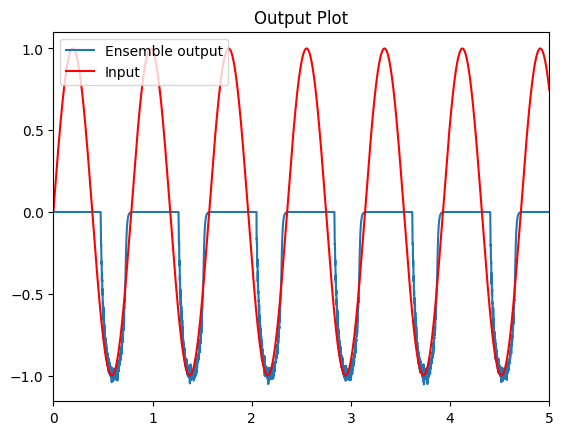

In [32]:
plt.figure()
plt.plot(sim.trange(), sim.data[ens_2_probe], label="Ensemble output")
plt.plot(sim.trange(), sim.data[input_probe], "r", label="Input")
plt.xlim(0, 5)
plt.title("Output Plot")
plt.legend()
plt.show()

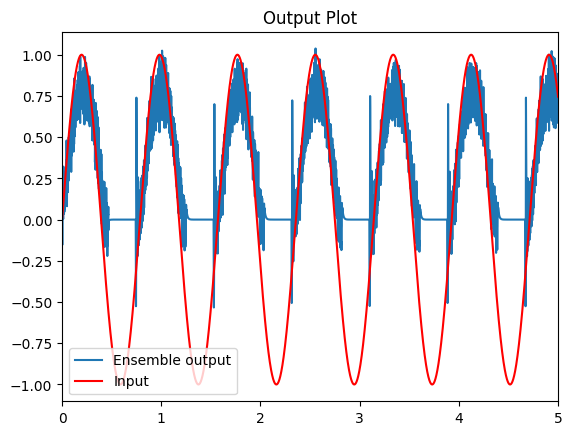

In [33]:
plt.figure()
plt.plot(sim.trange(), sim.data[ens_3_probe], label="Ensemble output")
plt.plot(sim.trange(), sim.data[input_probe], "r", label="Input")
plt.xlim(0, 5)
plt.title("Output Plot")
plt.legend()
plt.show()

(0.0, 5.0)

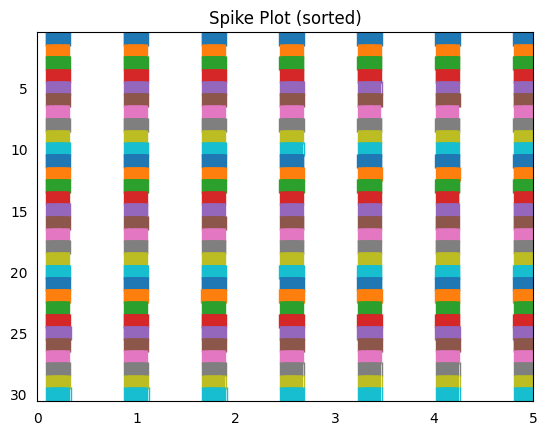

In [34]:
indices = sorted_neurons(ens_1, sim, iterations=250)
plt.figure()
rasterplot(sim.trange(), sim.data[ens_1_spike][:, indices])
plt.title("Spike Plot (sorted)")
plt.xlim(0, 5)

(0.0, 5.0)

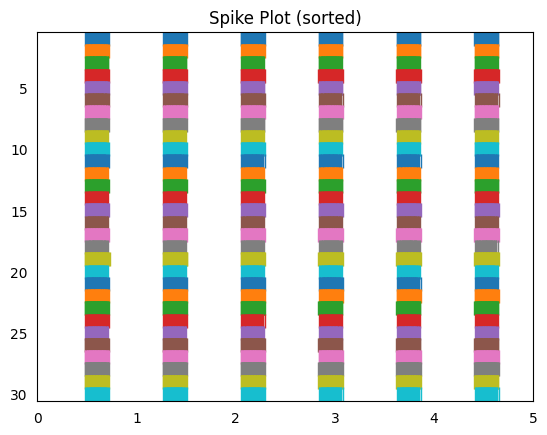

In [35]:
indices = sorted_neurons(ens_2, sim, iterations=250)
plt.figure()
rasterplot(sim.trange(), sim.data[ens_2_spike][:, indices])
plt.title("Spike Plot (sorted)")
plt.xlim(0, 5)

(0.0, 5.0)

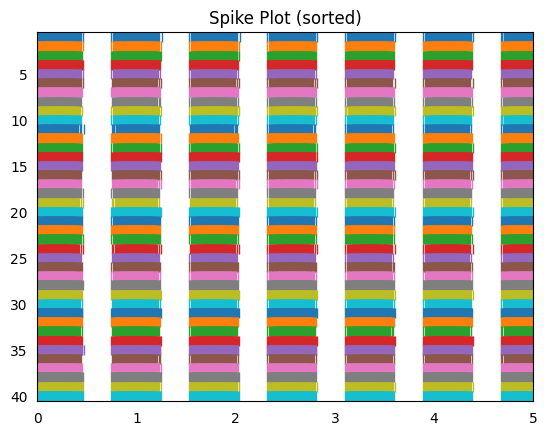

In [36]:
indices = sorted_neurons(ens_3, sim, iterations=250)
plt.figure()
rasterplot(sim.trange(), sim.data[ens_3_spike][:, indices])
plt.title("Spike Plot (sorted)")
plt.xlim(0, 5)

From the spike train, we can see that ens_1's spike trains are basically in the same position with ens_3 but the continous spike trains are shorter. The spike trains of ens_2 is approx. the opposite with ens_3.